### Chemische stoffen en Chlorofyl A 

Chlorofyl A wordt, als maat voor de biomassa van algen, gezien als een van de belangrijkste parameters voor het meten van waterkwaliteit<sup> 1</sup>. Het heeft als eigenschap de energie van licht bruikbaar te maken voor fotosynthese<sup> 2</sup>, waaruit onder andere zuurstof vrijkomt. Wanneer chlorofyl A in water voorkomt kan veilig aangenomen worden dat er sprake is van de aanwezigheid van (water)planten, en dat er voldoende voedingsstoffen in het water aanwezig zijn. Door de aanwezigheid van waterplanten kunnen aannames worden gemaakt over de kwaliteit van het water zelf<sup> 3</sup>. 

In acht nemend dat chlorofyl A en waterkwaliteit hand in hand lijken te gaan kan men veel duidelijkheid krijgen over factoren die het water beïnvloeden door onderzoek te doen naar verbanden tussen chlorofyl A en andere chemische stoffen. Een sterke positieve samenhang tussen chlorofyl A en een andere stof zou immers een indicatie zijn dat ook de betreffende stof veel aanwezig is in gezond water, waar een negatieve samenhang de stelling mogelijk maakt dat de betreffende stof veelal aanwezig is in ongezond water. Een overzicht van deze verbanden kan een positieve bijdrage leveren aan het interpreteren van watermonsters.


#### Databewerking

In de beschikbare data zijn er enkele zaken die aangepast moeten worden voor gekeken kan worden naar verbanden tussen chlorofyl A en andere chemische stoffen. 

De metingen die door de jaren heen zijn uitgevoerd hebben meer gegevens opgeleverd dan enkel waarnemingen van chemische stoffen. Hoewel metingen van bijvoorbeeld oppervlakte en troebelheid waardevolle informatie bieden, zijn deze overbodig in de hieronder volgende analyse. Uit een lijst meetparameters<sup> 4</sup> is een selectie gemaakt waarvan metingen bij dit deel van het onderzoek achterwege zijn gelaten. 

Hiernaast is het belangrijkste punt het samenvoegen van een aantal eigenschappen van watermonsters om dataverlies tijdens de analyse te voorkomen. Er zijn immers metingen waar meerdere meldingen van eenzelfde chemische stof gemaakt worden, maar in een andere hoedanigheid. Om te voorkomen dat deze meldingen tot één grote melding worden samengevoegd is de specificatie van iedere chemische stof in de data specifieker gemaakt; niet alleen wordt aangegeven welke stof gemeten is, maar ook welke meeteenheid gebruikt is (bijv. mg/l) en in welke hoedanigheid de stof is gemeten (bijv. na filtratie of drooggewicht). 

Hieronder staan de verschillende bewerkingen die zijn uitgevoerd weergegeven. Van belang is hierbij op te merken dat er voorafgaand aan onderstaande bewerkingen al veel opgeruimd is aan de data. Deze aanpassingen zijn hier niet weergegeven.


In [2]:
#Libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import datetime as dt


%matplotlib inline

In [3]:
#Read datafile
df = pd.read_csv('../data/data_clean.csv', error_bad_lines=False)

In [4]:
#List of parameters to be removed - kept in seperate file for convenience
remove_pars = pd.read_csv('../data/remove_cols.csv', header=None)
remove_pars_list = remove_pars[0].tolist()

In [5]:
#Overwrite datafile with filtered version, then fix PAR column for our purposes
df = df[~df.PAR.isin(remove_pars_list)]
df['PAR'] = df['PAR'] + ' ' + df['EHD'] + ' ' + df['HDH']
df.drop(columns=['Unnamed: 0'], inplace=True)

df.DATETIME = pd.to_datetime(df.DATETIME)

#### Ontwikkeling Chlorofyl A in Nederland
Voordat gekeken zal worden naar de samenhang van chemische stoffen met chlorofyl A, zoals hierboven beschreven staat, zal de aanwezigheid van chlorofyl A in de watermonsters in beeld worden gebracht. Hiermee kan een trend geschetst worden, en zal het mogelijk zijn voorspellingen te doen over de ontwikkeling van chlorofyl A in Nederlandse wateren. Door grote onregelmatigheid in de meetmomenten zal met maandelijkse gemiddelden worden gewerkt.

In [6]:
#Create the dataframe with... 
chlf_ts = df[(df.PAR == 'CHLFa ug/l NVT') & (df.BGC != '<')][['DATETIME', 'WAARDE']]
chlf_ts['DATETIME'] = pd.to_datetime(chlf_ts['DATETIME'])
chlf_ts.index = chlf_ts.DATETIME
chlf_ts.drop(columns=['DATETIME'], inplace=True)

#...monthly means - we need equal spacing for time series, after all. 
chlf_ts = chlf_ts.resample('M').mean()

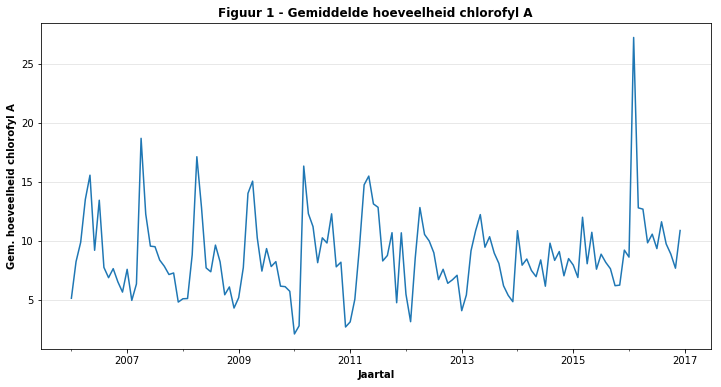

In [8]:
#Quick overview
fig, ax=plt.subplots(figsize=(12,6))
chlf_ts.plot(ax=ax, legend=False)
ax.set_xlabel("Jaartal", fontweight='bold')
ax.set_ylabel("Gem. hoeveelheid chlorofyl A", fontweight='bold')
ax.set_title("Figuur 1 - Gemiddelde hoeveelheid chlorofyl A", fontweight='bold', fontsize=12)
ax.yaxis.grid(color='lightgray', linestyle='-', linewidth=0.5 )
ax.set_axisbelow(True)
plt.savefig('../img/mean_chlfa_unfiltered.png')


None

<div align=left><img src="../img/mean_chlfa_unfiltered.png" width=750 align=center></div> Een aantal zaken is opvallend te noemen in figuur 1. Ten eerste is duidelijk te zien dat de hoeveelheid chlorofyl A enorm afhankelijk is van het seizoen, zoals uiteraard de verwachting was. Daarnaast valt op dat in algemene termen de gemeten hoeveelheden chlorofyl A nauwelijks toenemen door de jaren heen, hoewel een zeer voorzichtige stijging wel degelijk zichtbaar is. Tenslotte is de enorme piek in 2016 moeilijk te missen. Deze wordt veroorzaakt door één enkele ontzettend hoge meetwaarde. Deze waarde is in de oorspronkelijke meting dubbel gecontroleerd op juistheid, en is afkomstig van een locatie waar vaker uitzonderlijke waardes gemeten worden. 
<br><br>
Op deze specifeke locatie zal later ingegaan worden. Om een algemeen beeld te geven van de ontwikkeling van chlorofyl A in Nederland zal deze buiten beschouwing worden gelaten.

#### Toekomstige ontwikkeling van chlorofyl A
Omdat de aanwezigheid van chlorofyl A zoals eerder genoemd vrij stabiel (maar seizoensafhankelijk) is, kan de aanwezigheid van deze stof gemodelleerd worden. Door een tijdreeksmodel te maken ontstaat een verder inzicht in de te verwachten ontwikkeling van chlorofyl A in metingen, en of er een daling danwel stijging zichtbaar is.

Gebleken is dat dat metingen van chlorofyl A zich in beperkte mate lenen tot het doen van voorspellingen, met als voornaamste probleem dat de periode van beschikbare gegevens (van 10 jaar) eigenlijk aan de korte kant is. Dit is terug te zien in de kwaliteits- en evaluatiemetriek van het gemaakte model. Deze geven aan dat de gegevens zich an sich uitstekend lenen voor een dergelijk model en voor dergelijke voorspellingen, maar tonen ook aan dat fluctuaties in de metingen een nog te grote invloed hebben. Een gedetailleerde analyse hiervan is te vinden in bijlage 2.

Onderstaande afbeelding is een weergave van de prestaties van het voorspellingsmodel op de (in de gegevens aanwezige) jaren 2015 en 2016. In het rood is het daadwerkelijke verloop van de metingen te zien; in het blauw de door het model voorspelde waarden. Blauw geschaduwd zijn de "confidence intervals" van het model; dit kan gezien worden als een soort marge van onzekerheid. Het model is er 80% zeker van dat een toekomstige meting zich op een bepaalde datum tussen de grenzen van de donkerblauwe balk bevindt, en 95% zeker dat deze binnen de grenzen van de lichtblauwe balk te vinden is. Zoals eerder genoemd vangt het model de trend van de chlorofyl-metingen vrij goed op, maar is het niet in staat te reageren op scherpe fluctuaties in de metingen (die in de rode lijn zichtbaar zijn).
<br><br>

<div align=center><img src="../img/chlfa_timeseries_national_testset.png" width=750 align=center></div>

<br><br>
Wanneer gekeken wordt naar een langere termijn wordt steeds duidelijker dat er een te korte periode aan gegevens aanwezig is om een model op te baseren. Hieronder is een grafiek te zien van de voorspellingen van het model van 2015 tot 2020. Hier is goed te zien dat de grote invloed van seizoenen op chlorofyl A doorberekend wordt. Ook is zichtbaar dat, omdat er in de afgelopen 10 jaar op jaarbasis geen grote stijgingen of dalingen waren, het model heeft aangenomen dat dit ook in de toekomst zo zal blijven. Wel wordt logischerwijs de onzekerheidsmarge van het model steeds ruimer naarmate verder in de toekomst gekeken wordt. 

<br><br>
<div align=center><img src="../img/chlfa_timeseries_national_future.png" width=750 align=center></div>


In [9]:
#Re-initiate the dataframe without the location that breaks our trend... 
chlf_ts = df[(df.PAR == 'CHLFa ug/l NVT') & (df.BGC != '<') & (df.LOC != 'STEILBK')][['DATETIME', 'WAARDE']]
chlf_ts['DATETIME'] = pd.to_datetime(chlf_ts['DATETIME'])
chlf_ts.index = chlf_ts.DATETIME
chlf_ts.drop(columns=['DATETIME'], inplace=True)

#... but we still want monthly means - we need equal spacing for time series, after all. 
chlf_ts = chlf_ts.resample('M').mean()

In [10]:
#Store the CSV somewhere to load in R.
chlf_ts.to_csv('../data/chlf_ts.csv')

#### CORR TIME

In [11]:
#Create pivot table with multi-index
df_pivot_pars = df.pivot_table(index=['DATETIME', 'LOC'], values='WAARDE', columns='PAR')

In [12]:
#Calculate correlation matrix
correlated_pars = df_pivot_pars.corr()

In [14]:
#Filter relevant correlations
chlf_a_corrs = correlated_pars['CHLFa ug/l NVT']

In [15]:
strong_neg_corrs = chlf_a_corrs.sort_values()[0:15]
strong_pos_corrs = chlf_a_corrs.sort_values(ascending=False)[1:15]

In [16]:
pos_corr_counts = [df_pivot_pars[x].notnull().sum() for x in strong_pos_corrs.index]
neg_corr_counts =[df_pivot_pars[x].notnull().sum() for x in strong_neg_corrs.index]

In [17]:
#Positive
strong_positive_df = pd.DataFrame({"Chemical": strong_pos_corrs.index,
                                          "Correlation": strong_pos_corrs.values, 
                                          "No of Observations": pos_corr_counts})
strong_positive_df.set_index('Chemical', inplace=True)
#Negative
strong_negative_df = pd.DataFrame({"Chemical": strong_neg_corrs.index,
                                          "Correlation": strong_neg_corrs.values, 
                                          "No of Observations": neg_corr_counts})
strong_negative_df.set_index('Chemical', inplace=True)

In [19]:
#Er is carbofuran gevonden terwijl dat eigenlijk niet hoort/mag: doet deze waarde ertoe?
df[df.PAR == 'cbfrn ug/l NVT'].BGC.value_counts()

<    454
Name: BGC, dtype: int64


#### Verbanden

Aan de hand van bovenstaande analyse zijn de gemeten chemische stoffen gezocht die een sterke of zeer sterke samenhang met chlorofyl A vertonen. Zoals eerder genoemd zal er een scheiding gemaakt worden tussen positief respectievelijk negatief samenhangen met chlorofyl A. 


##### Positief

Hieronder een overzicht van de stoffen die sterk of zeer sterk positief samenhangen met chlorofyl A. Dit houdt in dat de aanwezigheid van een van deze stoffen vaak hand in hand blijkt te gaan met de aanwezigheid van chlorofyl A. 

Stof | Correlatie| Aantal metingen
------|-----|--------
1,2,3,7,8,9-hexachloordibenzofuraan	 | 0.901109 | 32
1,2,3,7,8- en 1,2,3,4,8-pentachloordibenzofuraan | 0.843445 | 42
2,3,7,8-tetrachloordibenzo-p-dioxine | 0.775929 | 42
1,2,3,6,7,8-hexachloordibenzofuraan	| 0.709462 | 42
2,2',5-trichloorbifenyl	| 0.684633  | 173
1,2,3,4,7,8- en 1,2,3,4,7,9-hexachloordibenzofuraan | 0.675965 | 44
Carbofuran | 0.587657 | 454
Calcium | 0.577354 | 1348
1,2,3,4,6,7,8,9-octachloordibenzofuraan	| 0.568267 | 44
1,2,3,4,6,7,8-heptachloordibenzofuraan	|0.559670 | 44



- Overduidelijk is dat er een grote mate van samenhang is tussen chlorofyl A en verscheidene zogeheten PCDD's of PCDF's. *Polychlorinated dibenzodioxins*, ookwel dioxines, zijn zeer vervuilende stoffen. Het zijn "bijproducten die gevormd worden tijdens de synthese van zekere industriële chemicaliën of tijdens verbranding"<sup> 5</sup>. In de richtlijnen van het europees parlement<sup> 6</sup> wordt duidelijk gemaakt dat dergelijke stoffen gevaarlijk te noemen zijn wanneer deze in waterlichamen aanwezig zijn. "Door hun hydrofobische aard wordt de meerderheid van dioxines dat in watersystemen vrijkomt uiteindelijk geassocieerd met fijnstof of gebioaccumuleerd in waterleven"<sup> 7</sup>. Hoewel het evident is dat de aanwezigheid van deze stoffen geen goede zaak is en indicatie is van milieuschade, is de samenhang tussen deze stoffen en chlorofyl A wel goed te verklaren. 
- Carbofuran is een uiterst giftige pesticide<sup> 8</sup>, die per december 2007 niet langer toegestaan is<sup> 9</sup>. De samenhang tussen carbofuran en chlorofyl A zal dus voor het overgrote deel uit oudere metingen komen, en is niet langer relevant. Verder onderzoek in de date wijst uit dat alle recentere metingen van carbofuran qua concentratie onder de betreffende grenswaarden vallen.
- Calcium is, onder andere, een essentiële voedingsstof voor planten; het speelt een (grote) rol in celwanden en membranen<sup> 10</sup>. De aanwezigheid hiervan is dan ook een voorwaarde voor de groei van waterplanten, en kan dus absoluut als positief worden gezien. Het is aannemelijk dat de aanwezigheid van een voldoende mate van calcium een positief oordeel over de kwaliteit van het water (voor plantengroei) mogelijk maakt.

##### Negatief

Hieronder een overzicht van de stoffen die sterk of zeer sterk negatief samenhangen met chlorofyl A. dit houdt in dat de aanwezigheid van een van deze stoffen vaak samen blijkt te gaan met een afwezigheid van chorofyl A, en vice versa. Stoffen die slechts enkele malen gemeten zijn worden hier buiten beschouwing gelaten; er zijn onvoldoende gegevens om van een betrouwbare samenhang te spreken.

Het is evident dat er geen stoffen zijn met een zeer sterke negatieve samenhang met chlorofyl A. Wel is er een groep vergelijkbare stoffen die een matig tot sterke samenhang met chlorofyl A vertonen. 

Stof | Correlatie | Aantal metingen
------|-----|------
Gallium | -0.571279 | 1423
Gadolinium | -0.556612 | 1392
Ytterbium | -0.545879 | 1260
Thorium | -0.541214 | 1408
Erbium | -0.539437 | 1260
Thulium | -0.539161 | 1260
Holmium | -0.538415 | 1260
Dysprosium | -0.533357 | 1260
Seleen | -0.530290 | 209

- Gallium<sup> 12</sup> is een vast, glanzend metaal. Het kent toepassingen in thermometers, zonnecellen, radiologie en andere zaken. Onderzoek<sup> 13</sup> heeft uitgewezen dat blootstelling aan gallium wortelgroei van planten beperkt en oxidatieve schade veroorzaakt. 
- Gadolinium, Ytterbium, Erbium, Thulium, Holmium en Dysprosium zijn allen lanthanides<sup> 14</sup>, en zijn metaalachtige elementen. Deels worden lanthanides gezien als zeldzame aarden; stoffen die van nature in de aardkorst te vinden zijn, en een breed scala aan industriële, wetenschappelijke en medische toepassingen kennen<sup> 14</sup>. Een eenduidig beeld over het effect van lanthanides op plantengroei is in de literatuur niet gevonden. Bovenstaande analyse lijkt duidelijk een negatief effect van lanthanides en zeldzame aarden op chlorofyl A en dus bladgroei te ondersteunen, maar "na compilatie en analyse van de data is gevonden dat REEs (zeldzame aarden) positieve effecten hebben  in lage concentraties en negatieve effecten in relatief hoge concentaties<sup> 15</sup>".
- Thorium<sup> 16</sup> is een metaalachtig, zwak radioactief element. Vanwege de radioactiviteit wordt het gebruik van thorium in industrie uitgefaseerd. Het is een van de weinige radioactieve elementen dat natuurlijk in de aardkorst te vinden is. 
- Seleen, tenslotte, is een stof die van natuur zeer veel in het milieu voorkomt, en speelt, met mate, een rol in menselijke gezondheid<sup> 17</sup>. Hoge metingen van seleen kunnen veroorzaakt worden door het gebruik van seleenrijke meststoffen in de landbouw.

#### Vervolgvragen

1. Er is, zoals inmiddels bekend, een samenhang tussen chlorofyl A enerzijds en PCDD's en PCDF's anderzijds. In de resultaten van de analyse is tevens zichtbaar dat dat deze stoffen steevast enkele tientallen keren gemeten worden. Zijn er zaken zichtbaar in de gegevens van deze metingen waarop ingegrepen kan worden om de waterkwaliteit te verbeteren, en zo ja, welke? 
2. Lanthanides en zeldzame aarden zijn op vrij grote schaal gemeten, en hebben een negatieve samenhang met chlorofyl A. Zijn deze stoffen op bepaalde locaties eenvoudigweg van nature aanwezig, of kan menselijk handelen hier invloed op hebben? Welke conclusies kunnen op basis van de gegevens getrokken worden?

### PCDD's, PCB's en PCDF's: Dioxines in Nederland
Diverse verschijningsvormen van dioxines kennen een grote mate van samenhang met chlorofyl A. Zoals eerder toegelicht is bioaccumuleren deze stoffen zich wanneer ze in het water belanden in waterleven, waaronder dus waterplanten. Deze stoffen zijn in richtlijnen van de Europese Unie<sup> 6</sup> als schadelijk bestempeld. 

Om beter inzichtelijk te maken of ingrijpen mogelijk of wenselijk is, zal specifieker gekeken worden naar de metingen waarin dioxines voorkomen.

#### Databewerking
Van alle beschikbare metingen worden vanzelfsprekenderwijs enkel de metingen van dioxines bewaard. PCB's, PCDF's en PCDD's zijn in verschillende hoedanigheden en meeteenheden opgeslagen. Zo kan er bij de ene meting sprake zijn van een waarde in ug/kg of ng/kg, en bij de andere meting van een waarde in ug/l. Dit verschil lijkt mede te maken te hebben met het compartiment waarin de meting gedaan is; of er sprake is van zwevende stof (in het water) of oppervlaktewater. 

Door dit verschil kan geen eenduidig oordeel geveld worden tot er een herschaling van deze metingen plaatsvindt. Hierom is een categorisering toegepast, waardoor de verschillen tussen meetlocaties onderling bekeken kunnen worden. Voor alle jaren waarvan gegevens beschikbaar waren is vervolgens geanalyseerd welke meetlocaties de hoogste concentraties dioxines kennen vergeleken met de andere meetlocaties. De resultaten van deze analyses zijn zowel gevisualiseerd op een kaart van Nederland als numeriek weergegeven. 

In [20]:
#Subset of all data that contains dioxins
df_dioxins = df[(df.PAR.str.contains('PCB')) | (df.PAR.str.contains('PCDF')) | (df.PAR.str.contains('PCDD'))]

In [21]:
#Filter out all measurements of dioxins that are below the reporting treshold
df_dioxins = df_dioxins[df_dioxins.BGC != '<']

In [22]:
#Repair datetime field
df_dioxins['DATETIME'] = pd.to_datetime(df_dioxins['DATETIME'])
altdf_dioxins = df_dioxins

In [23]:
#Categorise values to make EHD irrelevant
quantiles_dioxins = pd.qcut(df_dioxins[df_dioxins.EHD == 'ug/kg'].WAARDE, 5, labels=False)
quantiles_dioxins = quantiles_dioxins.append(pd.qcut(df_dioxins[df_dioxins.EHD == 'ug/l'].WAARDE, 5, labels=False))
quantiles_dioxins = quantiles_dioxins.append(pd.qcut(df_dioxins[df_dioxins.EHD == 'ng/kg'].WAARDE, 5, labels=False))

df_dioxins = pd.concat([df_dioxins, quantiles_dioxins], axis=1)
df_dioxins['QUANTILE'] = df_dioxins.iloc[:,-1]
df_dioxins.drop(df_dioxins.columns[-2], axis=1, inplace=True)

In [24]:
#Convert df_dioxins to a GeoDataFrame
dioxins_geometry = [Point(xy) for xy in zip(df_dioxins.X_RD, df_dioxins.Y_RD)]
dioxins_geo_df = gpd.GeoDataFrame(df_dioxins, geometry=dioxins_geometry)

In [25]:
#Visualize
nl_map = gpd.read_file('../data/shapefiles/2018-Imergis_provinciegrenzen_kustlijn.shp')
nl_rivers = gpd.read_file('../data/shapefiles/NL-water-simpel.shp')

In [26]:
def plot_this_year(year):
    '''Takes a year (that is within the Geodataframe, of course) and uses it to visualize locations
    where the highest concentrations of dioxins were measured. Annotations will only be placed on locations
    with the highest quantile of concentrations.'''
    #Annotation box props
    bbox_properties = dict(boxstyle="round,pad=0.3", fc="white", ec="k", lw=2)
    
    #DF manipulation
    geo_df_slice = dioxins_geo_df[dioxins_geo_df.DATETIME.dt.year == year]
    quantile_values = pd.DataFrame(geo_df_slice.groupby('LOC').QUANTILE.agg('mean'))
    geo_df_slice = geo_df_slice.merge(quantile_values, left_on='LOC', right_index=True)
    geo_df_slice['new_quantiles'] = pd.qcut(geo_df_slice.QUANTILE_y, 5, labels=False)
    
    #Plotting
    fig, ax = plt.subplots(figsize=(14,14), subplot_kw={'aspect':'equal'})
    ax.set_xlim(0,300000)
    ax.set_title("Dioxin pollution in quantiles, " + str(year), fontweight='bold')
    ax.set_ylim(300000,650000)
    ax.set_axis_off()
    nl_map.plot(ax=ax, edgecolor='darkgrey', linewidth=0.3)
    nl_rivers.plot(ax=ax, alpha=0.9, color='white')
    geo_df_slice.plot(ax=ax, cmap='RdYlGn_r',alpha=0.8, column='new_quantiles', scheme='quantiles', markersize=100)
    
    #Annotation
    annotated_locs = []
    for i, txt in enumerate(geo_df_slice.LOCOMS.tolist()):        
        if geo_df_slice.iloc[i, -1] > 3:
            if geo_df_slice.iloc[i, 1] not in annotated_locs:
                if (txt == "Beerkanaal midden"):
                    ax.text(s=txt, 
                            x=geo_df_slice.iloc[i,-8] - 15000,
                            y=geo_df_slice.iloc[i,-7] - 5500, 
                           fontweight='bold', 
                           bbox=bbox_properties)
                    annotated_locs.append(geo_df_slice.iloc[i, 1])
                elif (txt != 'Nieuwegein') & (txt != "Westzaan (kilometer 13)"):
                    ax.text(s=txt, 
                            x=geo_df_slice.iloc[i,-8],
                            y=geo_df_slice.iloc[i,-7] - 4500, 
                           fontweight='bold', 
                           bbox=bbox_properties)
                    annotated_locs.append(geo_df_slice.iloc[i, 1])
                else:
                    ax.text(s=txt, 
                            x=geo_df_slice.iloc[i,-8],
                            y=geo_df_slice.iloc[i,-7] + 3500, 
                           fontweight='bold', 
                           bbox=bbox_properties)
                    annotated_locs.append(geo_df_slice.iloc[i, 1])
 
                    
    return geo_df_slice



In [27]:
locs_of_interest = ['Nieuwegein', 'Gouda voorhaven', 'Nederweert', 'Schaar van Ouden Doel', 'Sas van Gent',
                   'Haringvlietsluis','Brienenoord (kilometer 996.5)', 'Nieuwersluis', 'Puttershoek', 'Keizersveer',
                   'Belfeld boven']

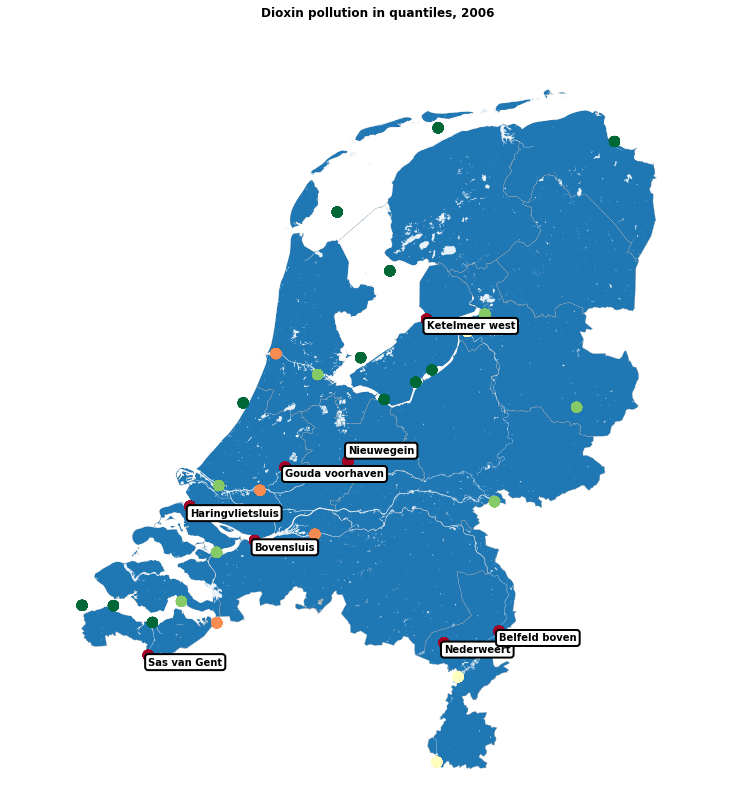

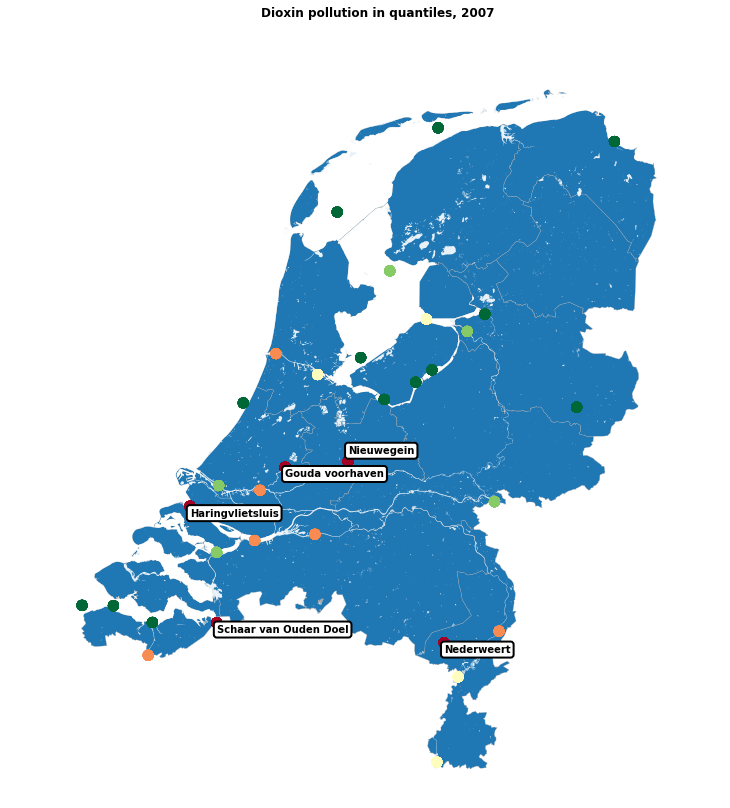

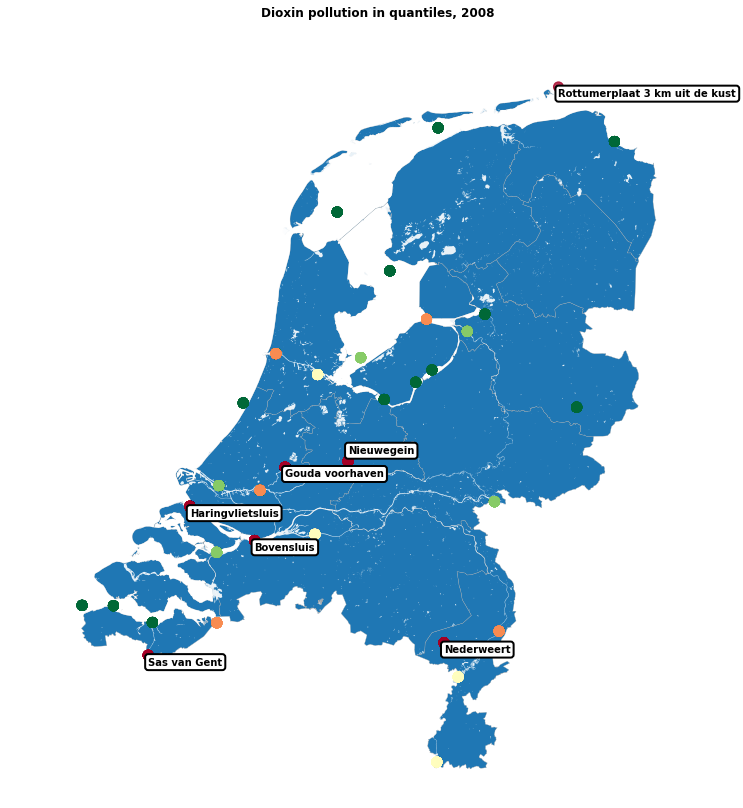

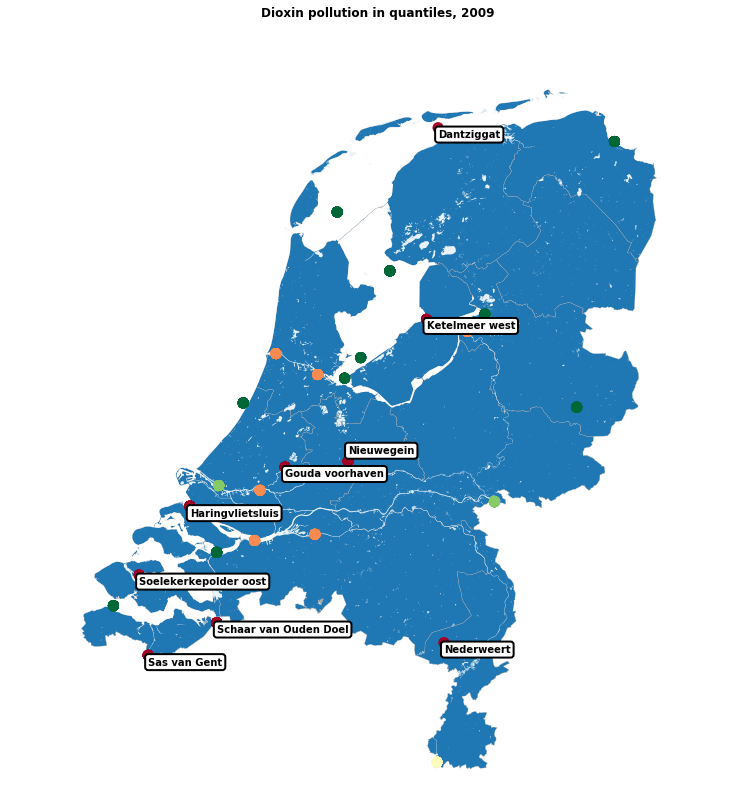

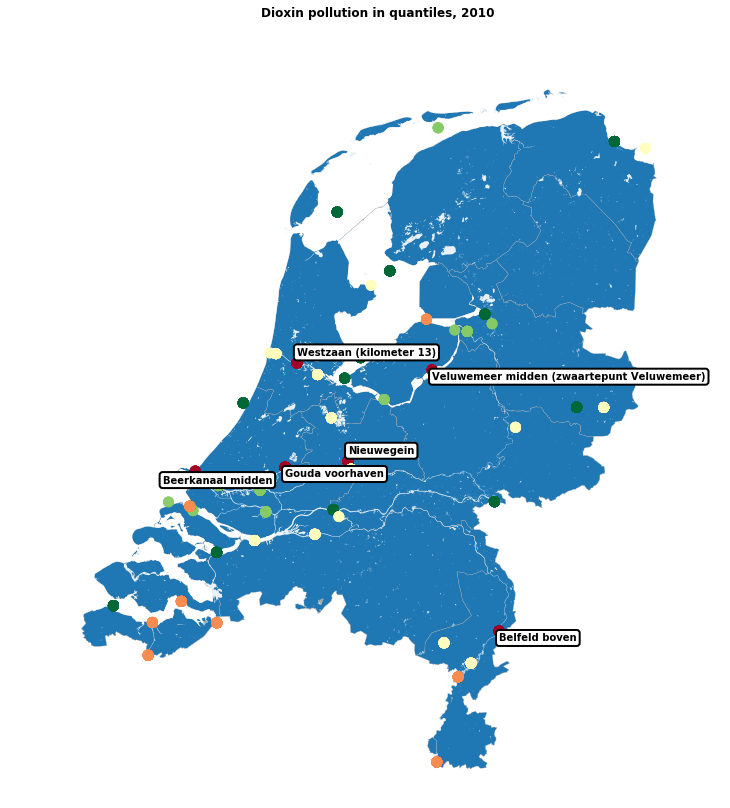

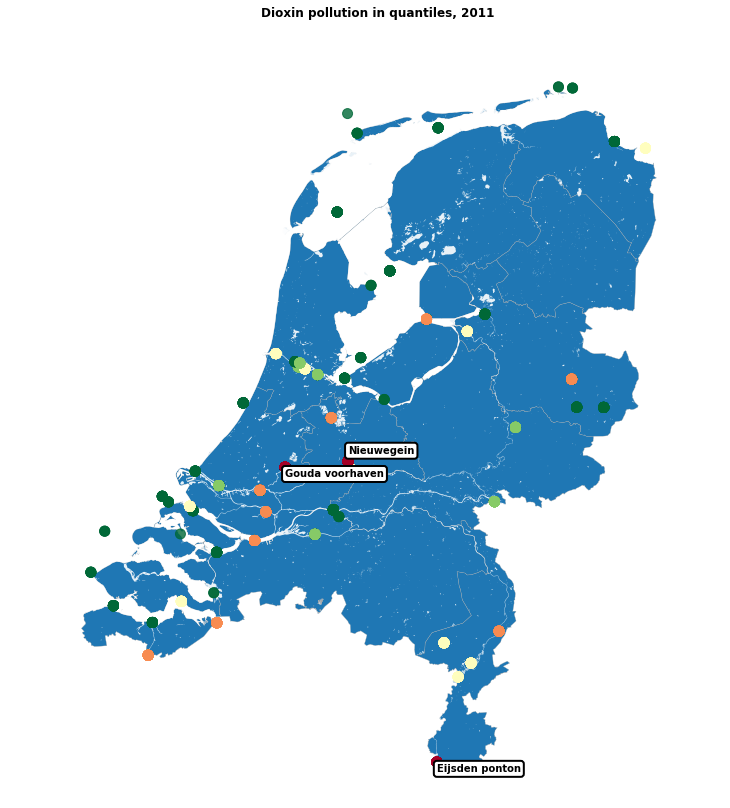

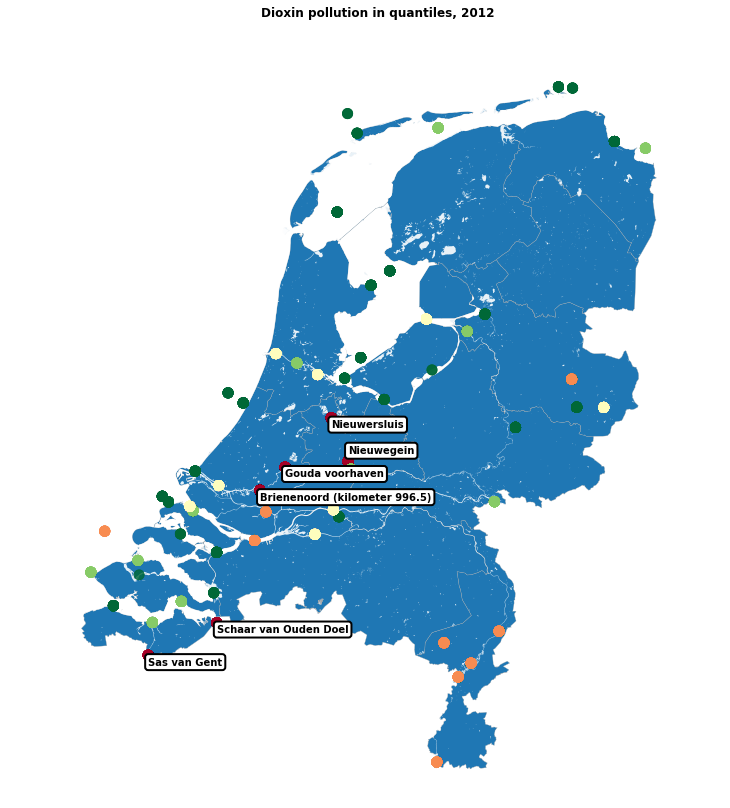

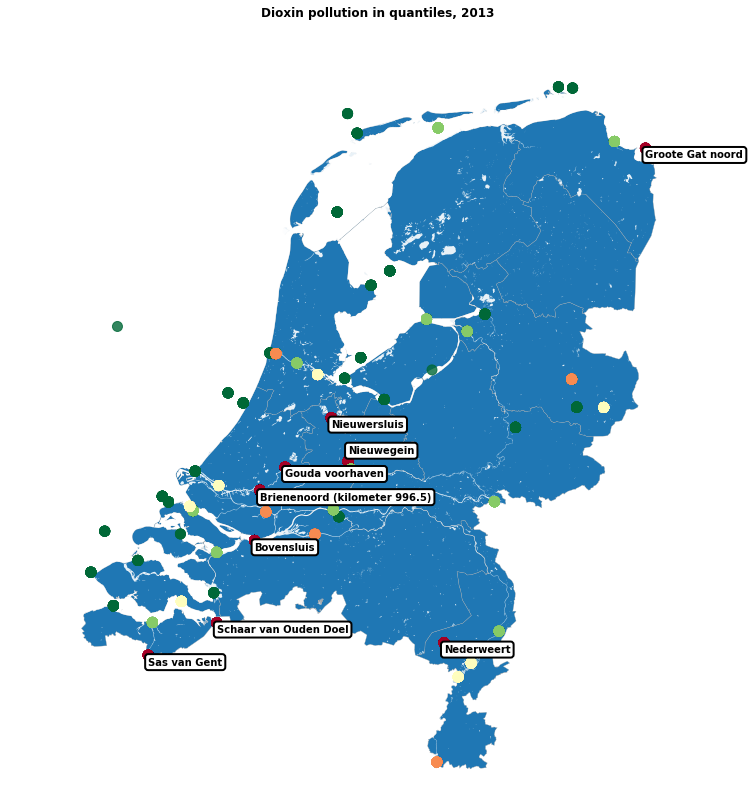

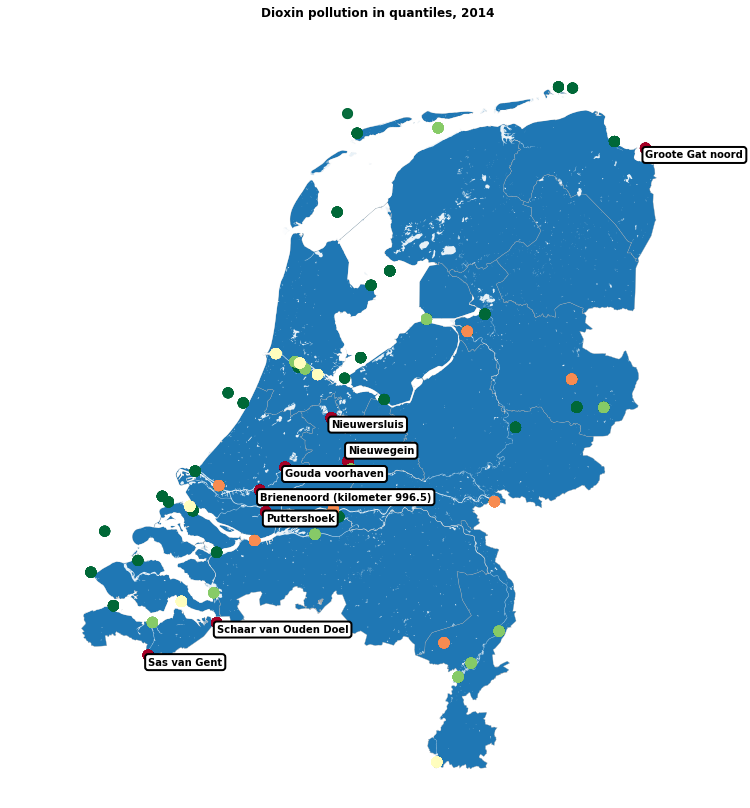

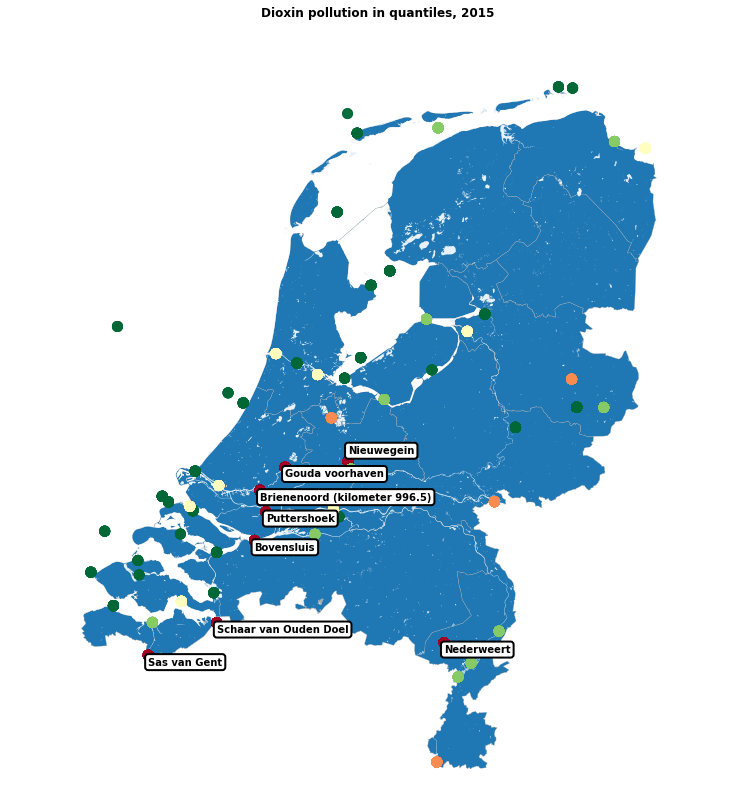

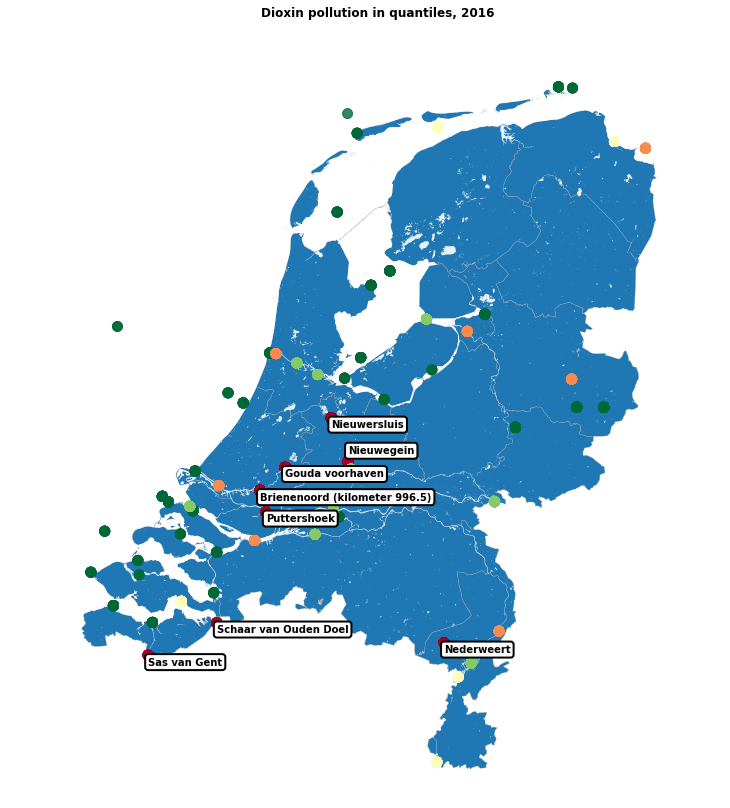

In [28]:
#Creates a dict with the top "polluted" locations per year.
#Also creates a new dataframe with locations for visualization for later. 
annotated_locations_yearly = {}
quantiled_dioxins_df = pd.DataFrame()

for year in dioxins_geo_df.DATETIME.dt.year.unique():
    x = plot_this_year(year)
    plt.savefig('../img/dioxins_concentration_' + str(year) + '.png')
    annotated_locations_yearly.update({year: x[x.new_quantiles > 3].LOCOMS.unique()})
    quantiled_dioxins_df = pd.concat([quantiled_dioxins_df, x])
    

In [29]:
#Populate a list, where each entry is the quantile for a location in a year
quantile_change_locs = []
for year in dioxins_geo_df.DATETIME.dt.year.unique():
    for loc in locs_of_interest: 
        quantile_change_locs.append([loc,quantiled_dioxins_df[(quantiled_dioxins_df.DATETIME.dt.year == year) &
                            (quantiled_dioxins_df.LOCOMS == loc)].new_quantiles.mean(), year])


In [30]:
#Convert said list to dataframe and pivot for plotting purposes. 
quantile_change_locs = pd.DataFrame(quantile_change_locs).fillna(0)
quantile_change_plottable = quantile_change_locs.pivot_table(index=0, values=1, columns=[2])
quantile_change_plottable.index.name=None
quantile_change_plottable.columns.name=None

In [31]:
quantile_change_plottable.sort_values(by=[2016, 2015, 2014], ascending=False, inplace=True)
quantile_change_plottable.style.background_gradient(cmap='RdYlGn_r')

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Brienenoord (kilometer 996.5),3,3,3,3,1,3,4,4,4,4,4
Gouda voorhaven,4,4,4,4,4,4,4,4,4,4,4
Nieuwegein,4,4,4,4,4,4,4,4,4,4,4
Puttershoek,3,3,3,0,1,3,3,3,4,4,4
Sas van Gent,4,3,4,4,3,3,4,4,4,4,4
Schaar van Ouden Doel,3,4,3,4,3,3,4,4,4,4,4
Nederweert,4,4,4,4,2,2,3,4,3,4,4
Nieuwersluis,0,0,0,0,2,3,4,4,4,3,4
Belfeld boven,4,3,3,0,4,3,3,1,1,1,3
Haringvlietsluis,4,4,4,4,3,2,2,2,2,2,1


#### Analyse
Uit het onderzoek naar dioxines in Nederland komen enkele locaties consistent als zorgwekkend naar boven. Uitzonderingen (die benoemd zullen worden) daargelaten zijn gedurende de tien jaar waarvan gegevens beschikbaar relatief weinig geografische verschuivingen door de jaren heen te zien. 

![](../img/dioxins_concentration_2016.png)



In bovenstaande afbeelding is de analyse van dioxines in 2016 (het laatst gemeten jaar) te zien. Dergelijke visualisaties van ieder jaar zijn te vinden in bijlage 4. Groene tinten zijn hierbij relatief lage, en rode tinten relatief hoge concentraties (ten opzichte van andere metingen in dat jaar). Duidelijk zichtbaar is dat grote delen van Nederland relatief lage concentraties van dioxines kennen. Vaak zijn de relatief hoge concentraties te zien in randstadgebieden of midden-limburg. 

<br><br>
<center>**Relatieve concentraties dioxines - meest opvallende locaties**</center>
![](../img/matrix_dioxines_notable.png)

De meest opvallende meetlocaties zijn hierboven weergegeven. Hier geldt dat hoe hoger de categorie, hoe hoger de concentratie dioxines relatief tot andere locaties, met een maximale waarde van 4. Enkele zaken die opvallen: 

1. Gouda voorhaven en Nieuwegein zijn zonder uitzondering ieder jaar te vinden bij de meest vervuilde locaties van het land. 
2. Sas van Gent, Schaar van Ouden Doel en Nederweert volgen een vergelijkbare trend, hoewel er jaren zijn geweest waar de concentraties net onder de hoogste categorie lagen. Sas van Gent en Schaaf van Ouden Doel liggen dicht bij Antwerpen en het kanaal Gent-Terneuzen, wat een verklaring is voor de relatief hoge vervuiling.
3. Brienenoord, Puttershoek en vooral Nieuwersluis zijn grote stijgers door de jaren heen, en zijn locaties waar een duidelijk negatieve trend te zien is. 
4. Haringvlietsluis, Belfeld boven en Keizersveer behoren tot de weinige locaties waar de relatieve concentraties door de jaren heen duidelijk zijn afgenomen. 

#### Dioxines in Nederland: conclusie
De voornaamste conclusie die kan worden getrokken is dat hoge metingen van dioxines zich voor een aanzienlijk deel in de randstad of midden-limburg bevinden. Metingen in midden-limburg zijn niet consistent hoog, maar variëren per jaar. Vanzelfsprekenderwijs grenzen deze locaties tevens aan het Duitse ruhrgebied, waarvan veilig kan worden aangenomen dat er veel vervuiling van in het water belandt. Een vergelijkbare situatie geldt bij Sas van Gent en Schaar van Ouden Doel, twee relatief sterk vervuilde locaties die tegen de Belgische grens bij zeeland aan liggen. Antwerpen en het kanaal Gent-Terneuzen (met nabijgelegen industriegebieden) hebben hier ongetwijfeld een grote invloed. 

Om deze redenen is de voornaamste aanbeveling dat verdere analyse of aandacht zou moeten gaan naar het randstadgebied tussen Rotterdam en Utrecht. Puttershoek, de Brienenoord, Gouda, Nieuwegein en Nieuwersluis vormen als het ware een as door Nederland waar de concentraties van dioxines consistent het hoogst zijn. De geanalyseerde metingen maken het zeer waarschijnlijk dat de waterkwaliteit op deze locaties relatief laag zal zijn. Afhankelijk van de precieze normen en richtlijnen kan ingrijpen wenselijk zijn. 

### VOORWERK TBV TIME SERIES
later verwijderen of verplaatsen naar boven

In [28]:
chlf_outlier_check = df[(df.PAR == 'CHLFa ug/l NVT') & (df.BGC != '<')]

In [30]:
chlf_outlier_check.sort_values(by='WAARDE', ascending=False)

,DATETIME,LOC,PAR,BGC,WAARDE,KWC,EHD,WNS,HDH,ANA,...,HDHOMS,ANAOMS,CPMOMS,BEMOMS,BEWOMS,SGKOMS,X_RD,Y_RD,X_WGS,Y_WGS
618323,2016-02-22 11:48:00,STEILBK,CHLFa ug/l NVT,NaN,970.000,6,ug/l,282,NVT,N6520,...,Niet van toepassing,Spectrofotometrische bepaling,Oppervlaktewater,Steekmonster,Niet van toepassing,NaN,171333.0,537903.0,5.629536,52.82810
688606,2016-02-22 09:12:00,HOUTRHK,CHLFa ug/l NVT,NaN,390.000,6,ug/l,282,NVT,N6520,...,Niet van toepassing,Spectrofotometrische bepaling,Oppervlaktewater,Steekmonster,Niet van toepassing,NaN,160800.0,508100.0,5.472736,52.56048
567116,2007-07-24 08:58:00,VROUWZD,CHLFa ug/l NVT,NaN,170.000,0,ug/l,282,NVT,N6520,...,Niet van toepassing,Spectrofotometrische bepaling,Oppervlaktewater,Steekmonster,Niet van toepassing,NaN,155400.0,535900.0,5.393138,52.81035
1698409,2012-05-24 11:58:00,SCHAARVODDL,CHLFa ug/l NVT,NaN,160.000,0,ug/l,282,NVT,X096,...,Niet van toepassing,Bep van CHLFa mbv spectrofotometerie gelijkw. ...,Oppervlaktewater,Steekmonster,Niet van toepassing,NaN,75825.0,374070.0,4.250659,51.35029
527670,2006-03-27 13:11:00,EEMMDK23,CHLFa ug/l NVT,NaN,160.000,0,ug/l,282,NVT,N6520,...,Niet van toepassing,Spectrofotometrische bepaling,Oppervlaktewater,Steekmonster,Niet van toepassing,NaN,152810.0,476750.0,5.355114,52.27875
1651589,2009-04-16 13:21:00,SCHAARVODDL,CHLFa ug/l NVT,NaN,158.000,0,ug/l,282,NVT,N6520,...,Niet van toepassing,Spectrofotometrische bepaling,Oppervlaktewater,Steekmonster,Niet van toepassing,NaN,75825.0,374070.0,4.250659,51.35029
1664776,2010-04-28 09:19:00,SCHAARVODDL,CHLFa ug/l NVT,NaN,155.000,0,ug/l,282,NVT,N6520,...,Niet van toepassing,Spectrofotometrische bepaling,Oppervlaktewater,Steekmonster,Niet van toepassing,NaN,75825.0,374070.0,4.250659,51.35029
1665278,2010-05-11 19:57:00,SCHAARVODDL,CHLFa ug/l NVT,NaN,150.000,0,ug/l,282,NVT,N6520,...,Niet van toepassing,Spectrofotometrische bepaling,Oppervlaktewater,Steekmonster,Niet van toepassing,NaN,75825.0,374070.0,4.250659,51.35029
530955,2008-08-11 11:09:00,EEMMDK23,CHLFa ug/l NVT,NaN,150.000,0,ug/l,282,NVT,N6520,...,Niet van toepassing,Spectrofotometrische bepaling,Oppervlaktewater,Steekmonster,Niet van toepassing,NaN,152810.0,476750.0,5.355114,52.27875
1713822,2013-05-21 18:05:00,SCHAARVODDL,CHLFa ug/l NVT,NaN,150.000,0,ug/l,282,NVT,N6520,...,Niet van toepassing,Spectrofotometrische bepaling,Oppervlaktewater,Steekmonster,Niet van toepassing,NaN,75825.0,374070.0,4.250659,51.35029


In [37]:
chlf_outlier_check[chlf_outlier_check.LOC == 'STEILBK'].sort_values(by='WAARDE', ascending=False)

,DATETIME,LOC,PAR,BGC,WAARDE,KWC,EHD,WNS,HDH,ANA,...,HDHOMS,ANAOMS,CPMOMS,BEMOMS,BEWOMS,SGKOMS,X_RD,Y_RD,X_WGS,Y_WGS
618323,2016-02-22 11:48:00,STEILBK,CHLFa ug/l NVT,NaN,970.00,6,ug/l,282,NVT,N6520,...,Niet van toepassing,Spectrofotometrische bepaling,Oppervlaktewater,Steekmonster,Niet van toepassing,NaN,171333.0,537903.0,5.629536,52.8281
621289,2016-08-08 10:30:00,STEILBK,CHLFa ug/l NVT,NaN,140.00,0,ug/l,282,NVT,X152,...,Niet van toepassing,German standard method for the det. of CHLFa (...,Oppervlaktewater,Steekmonster,Niet van toepassing,NaN,171333.0,537903.0,5.629536,52.8281
590356,2011-09-12 11:24:00,STEILBK,CHLFa ug/l NVT,NaN,85.40,0,ug/l,282,NVT,X096,...,Niet van toepassing,Bep van CHLFa mbv spectrofotometerie gelijkw. ...,Oppervlaktewater,Steekmonster,Niet van toepassing,NaN,171333.0,537903.0,5.629536,52.8281
588322,2011-05-24 11:49:00,STEILBK,CHLFa ug/l NVT,NaN,84.50,0,ug/l,282,NVT,X096,...,Niet van toepassing,Bep van CHLFa mbv spectrofotometerie gelijkw. ...,Oppervlaktewater,Steekmonster,Niet van toepassing,NaN,171333.0,537903.0,5.629536,52.8281
595360,2012-07-16 10:37:00,STEILBK,CHLFa ug/l NVT,NaN,80.00,0,ug/l,282,NVT,X096,...,Niet van toepassing,Bep van CHLFa mbv spectrofotometerie gelijkw. ...,Oppervlaktewater,Steekmonster,Niet van toepassing,NaN,171333.0,537903.0,5.629536,52.8281
602786,2013-09-10 10:26:00,STEILBK,CHLFa ug/l NVT,NaN,80.00,0,ug/l,282,NVT,N6520,...,Niet van toepassing,Spectrofotometrische bepaling,Oppervlaktewater,Steekmonster,Niet van toepassing,NaN,171333.0,537903.0,5.629536,52.8281
589868,2011-08-16 10:51:00,STEILBK,CHLFa ug/l NVT,NaN,79.30,0,ug/l,282,NVT,X096,...,Niet van toepassing,Bep van CHLFa mbv spectrofotometerie gelijkw. ...,Oppervlaktewater,Steekmonster,Niet van toepassing,NaN,171333.0,537903.0,5.629536,52.8281
580785,2010-03-29 12:23:00,STEILBK,CHLFa ug/l NVT,NaN,78.00,0,ug/l,282,NVT,N6520,...,Niet van toepassing,Spectrofotometrische bepaling,Oppervlaktewater,Steekmonster,Niet van toepassing,NaN,171333.0,537903.0,5.629536,52.8281
614422,2015-07-13 11:09:00,STEILBK,CHLFa ug/l NVT,NaN,78.00,0,ug/l,282,NVT,N6520,...,Niet van toepassing,Spectrofotometrische bepaling,Oppervlaktewater,Steekmonster,Niet van toepassing,NaN,171333.0,537903.0,5.629536,52.8281
609086,2014-08-12 09:04:00,STEILBK,CHLFa ug/l NVT,NaN,77.00,0,ug/l,282,NVT,N6520,...,Niet van toepassing,Spectrofotometrische bepaling,Oppervlaktewater,Steekmonster,Niet van toepassing,NaN,171333.0,537903.0,5.629536,52.8281


#### Lanthanides
Lanthanides (zeldzame aarden) zijn vaak metaalachtige elementen. Deze zijn op vrij grote schaal gemeten, en hebben een redelijk sterke negatieve samenhang met chlorofyl A. Omdat dit veelal stoffen zjn die van nature in de aardkorst voorkomen is de hoeveelheid of hoogte van metingen hiervan op zichzelf niet problematisch. Daarnaast is, zoals eerder genoemd, in de literatuur geen eenduidig beeld te vinden over de effecten van diverse concentraties van deze stoffen op flora en fauna. Wel is het relevant analyse uit te voeren naar de locaties waar deze stoffen het meest gemeten worden. Deze locaties zouden hierdoor voor extra monitoring in aanmerking komen. 

In [32]:
lanthanide_list = ['Gd mg/kg dg', 'Yb mg/kg dg', 'Er mg/kg dg', 'Tm mg/kg dg', 'Ho mg/kg dg', 'Dy mg/kg dg']

In [33]:
df_lanthanides = df[df.PAR.isin(lanthanide_list)]
df_lanthanides['DATETIME'] = pd.to_datetime(df_lanthanides['DATETIME'])

lanthanides_geometry = [Point(xy) for xy in zip(df_lanthanides.X_RD, df_lanthanides.Y_RD)]
lanthanides_geo_df = gpd.GeoDataFrame(df_lanthanides, geometry=lanthanides_geometry)

/home/youri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


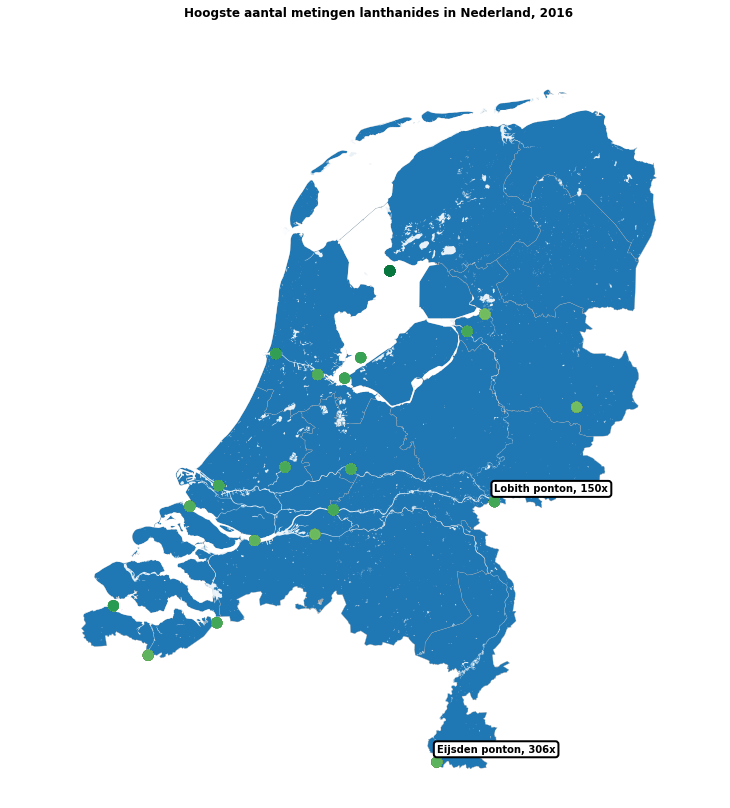

In [34]:
#Filter DF and set textbox props
lanthanides_2016 = lanthanides_geo_df[lanthanides_geo_df.DATETIME.dt.year == 2016]
bbox_properties = dict(boxstyle="round,pad=0.3", fc="white", ec="k", lw=2)

#Plot
fig, ax = plt.subplots(figsize=(14,14), subplot_kw={'aspect':'equal'})
ax.set_xlim(0,300000)
ax.set_ylim(300000,650000)
ax.set_axis_off()
ax.set_title("Hoogste aantal metingen lanthanides in Nederland, 2016", fontweight='bold')
nl_map.plot(ax=ax, edgecolor='darkgrey', linewidth=0.3)
nl_rivers.plot(ax=ax, alpha=0.9, color='white')
lanthanides_2016.plot(ax=ax, cmap='RdYlGn_r',alpha=0.8, column='WAARDE', markersize=100)

#Annotate
annotated_locs = []
for i, txt in enumerate(lanthanides_2016.LOCOMS.tolist()):        
    if lanthanides_2016.iloc[i, 1] not in annotated_locs:
        if lanthanides_2016.LOCOMS.value_counts()[txt] > 100:
            ax.text(s=txt + ', ' + str(lanthanides_2016.LOCOMS.value_counts()[txt]) + 'x', 
                    x=lanthanides_2016.iloc[i,-5],
                    y=lanthanides_2016.iloc[i,-4] + 4500, 
                   fontweight='bold', 
                   bbox=bbox_properties)
            annotated_locs.append(lanthanides_2016.iloc[i, 1])
            
plt.savefig('../img/lanthanides.png')

###  Lanthanides: conclusie
In de onderstaande afbeelding zijn de locaties getoond waar lanthanides het meest gemeten zijn. Opvallend hieraan was dat deze twee locaties, Lobith en Eijsden, met kop en schouders boven de andere locaties uitsteken. Aangezien eerder is genoemd dat lanthanides van nature in de aardkorst voorkomen, zijn locaties waar relatief weinig metingen geweest zijn buiten beschouwing gelaten. 

![](../img/lanthanides.png)

Gebleken is dat Eijsden en Lobith locaties zijn waar het zogeheten Aqualarm<sup> 18</sup>, een systeem waarmee de waterkwaliteit bepaald wordt, actief is. Door dit systeem wordt de kwaliteit van rivierwater extra nauwkeurig gecontroleerd, omdat in deze gebieden drinkwaterproducenten actief zijn. Het is meer dan waarschijnlijk dat de hoge hoeveelheden metingen een direct gevolg zijn van de meer regelmatige en actieve meting van waterkwaliteit op deze plaatsen.

Verdere actie hoeft hierop dan ook niet worden ondernomen; de verdere monitoring die in de inleiding op dit onderwerp geopperd werd is reeds actief.

#### Bronvermelding

1. van Urk, Helmerhorst, Ruiter (1990). *De spectrofotometrische bepaling van chlorophyll-a in oppervlaktewater(NEN 6520) kritisch bekeken.* [H<sub>2</sub>O tijdschrift voor watervoorziening en afvalwaterbehandeling 23 (20): 554 - 559](http://edepot.wur.nl/376174)
2. Bladgroen. (z.d.). In *Wikipedia*. Geraadpleegd 18 april 2018, van https://nl.wikipedia.org/wiki/Bladgroen
3. Weeda, E.J. (2011). *Waterplanten als maat voor de biologische kwaliteit van oppervlaktewateren.* [Wageningen University & Research](http://webdocs.alterra.wur.nl/internet/corporate/prodpubl/boekjesbrochures/waterplanten.pdf)
4. Parameter. (z.d.) In *Waterbase*. Geraadpleegd 22 april 2018, van http://live.waterbase.nl/metis/cgi-bin/mivd.pl?action=value&casnum=NVT&format=html&lang=nl&order=parcod&type=par
5. Bursian, S., Newsted, J., Zwiernik, M. (2011). *Polychlorinated biphenyls, polychlorinated dibenzo-p-dioxins and polychlorinated dibenzofurans.* [Reproductive and Developmental Toxicology, 543-567](https://www.sciencedirect.com/science/article/pii/B9780123820327100414)
6. RICHTLIJN 2000/60/EG VAN HET EUROPEES PARLEMENT EN DE RAAD. (2000). [Publicatieblad van de Europese Unie, PB L327, blz 89](http://eur-lex.europa.eu/legal-content/NL/TXT/PDF/?uri=CELEX:02000L0060-20141120&qid=1456219868866&from=NL:PDF#page=89&zoom=100http://eur-lex.europa.eu/legal-content/NL/TXT/PDF/?uri=CELEX:02000L0060-20141120&qid=1456219868866&from=NL:PDF#page=89&zoom=100)
7. POLYCHLORINATED DIBENZO-P-DIOXINS (PCDDS), POLYCHLORINATED DIBENZOFURANS (PCDFS), AND DIOXIN-LIKE POLYCHLORINATED BIPHENYLS (DL-PCBS). (2011). [Environmental Quality Dossier 2011, 21](https://circabc.europa.eu/webdav/CircaBC/env/wfd/Library/framework_directive/thematic_documents/priority_substances/supporting_substances/eqs_dossiers/Dioxins%20%26%20PCB-DL%20EQS%20dossier%202011.pdf)
8. Carbofuran. (z.d.). In *Wikipedia*. Geraadpleegd 19 april 2018, van https://nl.wikipedia.org/wiki/Carbofuran
9. Kyprianou, M. (2007). *Beschikking van de commissie betreffende de niet-opneming van carbofuran.* [Publicatieblad van de Europese Unie, L156/30](http://eur-lex.europa.eu/LexUriServ/LexUriServ.do?uri=CELEX:32007D0416:NL:HTML)
10. White, P. J., & Broadley, M. R. (2003). *Calcium in Plants.* [Annals of Botany, 92(4), 487–511.](http://doi.org/10.1093/aob/mcg164)
11. Waterstoffluoride. (z.d.). In *Wikipedia*. Geraadpleegd 26 april 2018, van https://nl.wikipedia.org/wiki/Waterstoffluoride
12. Gallium. (z.d.). In *Periodiek Systeem*. Geraadpleegd 29 april 2018, van http://periodieksysteem.com/element/gallium
13. Chang, H.F. et al. (2017). *Effect of Gallium Exposure in Arabidopsis thaliana is Similar to Aluminum Stress.* [Environmental Science & Technology 2017 51 (3), 1241-1248](https://www.ncbi.nlm.nih.gov/pubmed/28088849)
14. Lanthanide. (z.d.) In *Wikipedia*. Geraadpleegd 26 april 2018, van https://en.wikipedia.org/wiki/Lanthanide
15. Zhang, C. et al. (2013). *Effects of rare earth elements on growth and metabolism of medicinal plants*. [Acta Pharmaceutica Sinica B, 20-24](https://www.sciencedirect.com/science/article/pii/S2211383512001645)
16. Thorium. (z.d.). In *Wikipedia*. Geraadpleegd 29 april 2018, van https://en.wikipedia.org/wiki/Thorium
17. Seleen. (z.d.). In *Lenntech*. Geraadpleegd 29 april 2018, van https://www.lenntech.nl/periodiek/elementen/se.htm
18. Aqualarm (z.d.). In *Ministerie van Infrastructuur en Waterstaat*. Geraadpleegd 26 mei 2018, van https://www.rijkswaterstaat.nl/water/waterbeheer/waterkwaliteit/indicatoren-voor-waterkwaliteit/aqualarm/